# KDE Multivariado

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import make_normal_data
np.random.seed(123)
plt.style.use('seaborn-v0_8')

## Implementação do KDE Multidimensional

In [8]:
def kernel(u):
    return (1 / (np.sqrt(2 * np.pi))) * np.exp(-(u ** 2) / 2)

def kde_multi(xi, data, h):
    dim = len(data)
    n = len(data[0])
    pxi = 0
    for j in range(dim):
        multi = 1
        for k in range(n):    
            multi *= kernel((xi[k] - data[j][k]) / h)
        pxi += multi
    pxi /= dim * h**n
    return pxi

## Gerando dados sintéticos 2D

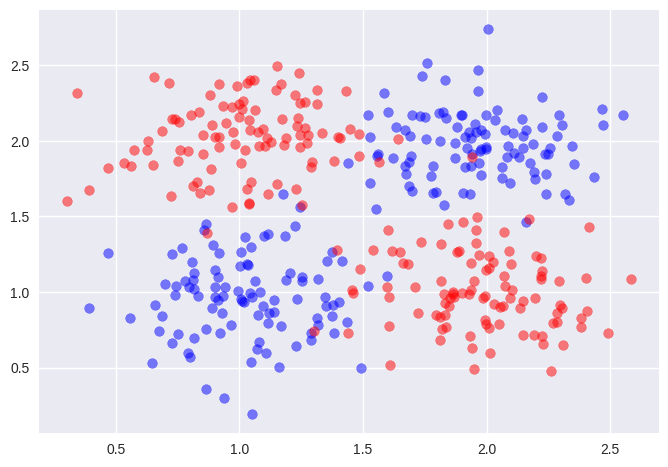

In [9]:
s = 0.25
n = 100
dim = 2
x1, y1 = make_normal_data(s = s, n = n, c = np.array([1, 1]), dim = 2, label = 1)
x2, y2 = make_normal_data(s = s, n = n, c = np.array([2, 2]), dim = 2, label = 1)
x3, y3 = make_normal_data(s = s, n = n, c = np.array([1, 2]), dim = 2, label = -1)
x4, y4 = make_normal_data(s = s, n = n, c = np.array([2, 1]), dim = 2, label = -1)
colors = ['blue', 'blue', 'red', 'red']
for x, y, colors in zip([x1, x2, x3, x4], [y1, y2, y3, y4], colors):
    plt.scatter(x[:, 0], x[:, 1], c = colors, alpha= 0.5)

xc1 = np.vstack((x1, x2))
xc2 = np.vstack((x3, x4))
nc1 = len(xc1)
nc2 = len(xc2)
yall = np.concatenate((y1, y2, y3, y4))

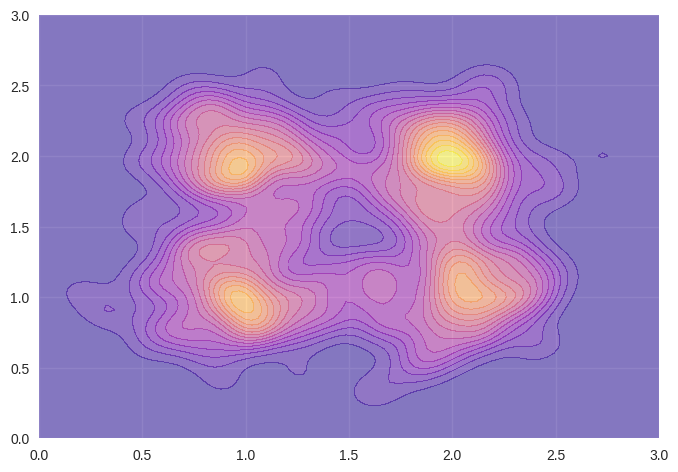

In [10]:
data = np.vstack((x1, x2, x3, x4))
h = 0.1
xseq = np.linspace(0, 3, 100)
yseq = np.linspace(0, 3, 100)
M1 = np.zeros((len(xseq), len(yseq)))
for i in range(len(xseq)):
    for j in range(len(yseq)):
        M1[i][j] = kde_multi(np.array([xseq[i], yseq[j]]), data, h)

plt.contourf(xseq, yseq, M1, levels=20, cmap='plasma', alpha=0.5)

## Visualizando as projeções das probabilidades a priori

(400,)
(400,)


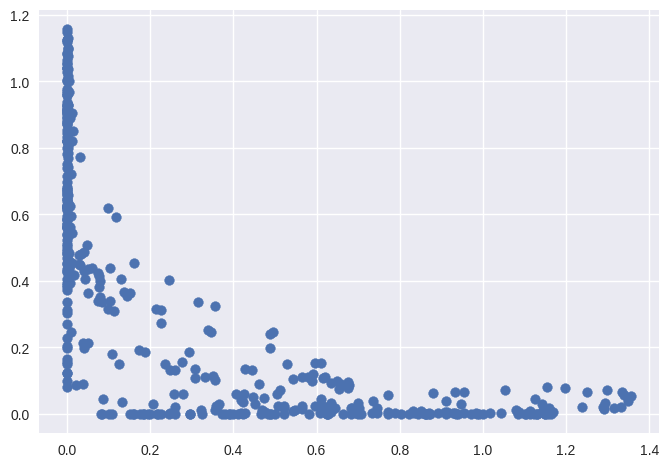

In [11]:
pxc1 = np.zeros((len(data)))
pxc2 = np.zeros((len(data)))
for i in range(len(data)):
    pxc1[i] = kde_multi(data[i], xc1, h)
    pxc2[i] = kde_multi(data[i], xc2, h)

print(pxc1.shape)
print(pxc2.shape)
colors = ['blue', 'red']
plt.scatter(pxc1, pxc2)

In [15]:
hseq = np.linspace(0.01, 0.5, 100)
acc_tr = np.zeros((len(hseq)))

for ch, h in enumerate(hseq):
    pxc1 = np.zeros(len(data))
    pxc2 = np.zeros(len(data))
    yhat_tr = np.zeros(len(data))  # zera a cada h

    for i in range(len(data)):
        pxc1[i] = kde_multi(data[i], xc1, h)
        pxc2[i] = kde_multi(data[i], xc2, h)
        
        # Para evitar divisão por zero:
        if pxc2[i] == 0 and pxc1[i] == 0:
            yhat_tr[i] = 1  # ou algum valor neutro
        elif pxc2[i] == 0:
            yhat_tr[i] = -1
        else:
            yhat_tr[i] = 1 if (pxc1[i]/pxc2[i]) > 1 else -1
    acc_tr[ch] = np.sum(yhat_tr == yall) / len(data)
print(acc_tr)


/tmp/ipykernel_10983/2971327244.py:19: RuntimeWarning: overflow encountered in scalar divide
  yhat_tr[i] = 1 if (pxc1[i]/pxc2[i]) > 1 else -1


[0.9125 0.9725 1.     0.995  0.995  0.9925 0.9875 0.9825 0.9825 0.9725
 0.97   0.965  0.965  0.965  0.9675 0.965  0.965  0.965  0.965  0.9625
 0.9625 0.9625 0.9625 0.9625 0.9625 0.9625 0.9625 0.9625 0.9625 0.9625
 0.9625 0.9625 0.9625 0.9625 0.9625 0.9625 0.96   0.96   0.96   0.96
 0.96   0.96   0.96   0.96   0.96   0.96   0.96   0.96   0.96   0.96
 0.96   0.96   0.96   0.96   0.9575 0.9575 0.9575 0.955  0.955  0.955
 0.955  0.955  0.955  0.955  0.955  0.955  0.955  0.955  0.955  0.955
 0.955  0.9525 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525
 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525
 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525 0.9525]


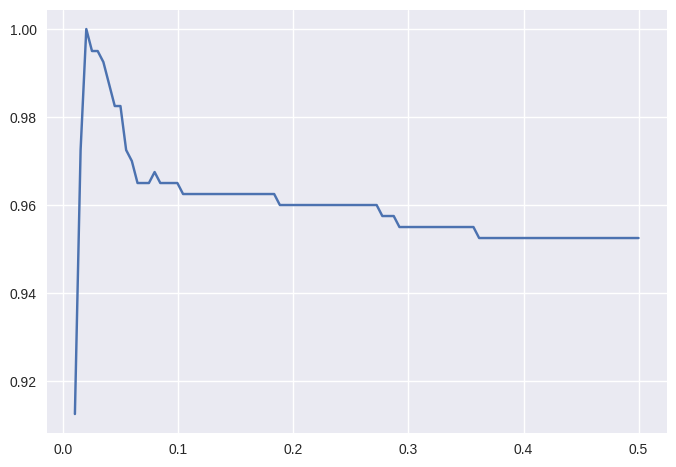

In [17]:
plt.plot(hseq, acc_tr, label='Acurácia de Treinamento')